In [1]:
from keras.datasets import fashion_mnist
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import numpy as np
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

%matplotlib inline


import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras import regularizers

(x_traina, y_traina), (x_testa, y_testa) = fashion_mnist.load_data()
# x_train_size = len(x_train)
# x_train_reshape = x_train.reshape(x_train_size, -1)


Using TensorFlow backend.


In [2]:
# KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
num_points = x_traina.shape[0]
x_train = np.reshape(x_traina,(num_points,-1))
kmeans.fit(x_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [3]:
num_points1 = x_testa.shape[0]
x_test = np.reshape(x_testa,(num_points1,-1))
ylab_train = kmeans.labels_
ylab_test = kmeans.predict(x_test)

In [4]:
print(ylab_test)

[3 2 4 ... 8 4 6]


In [5]:
score = metrics.v_measure_score(y_testa, ylab_test)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.512841


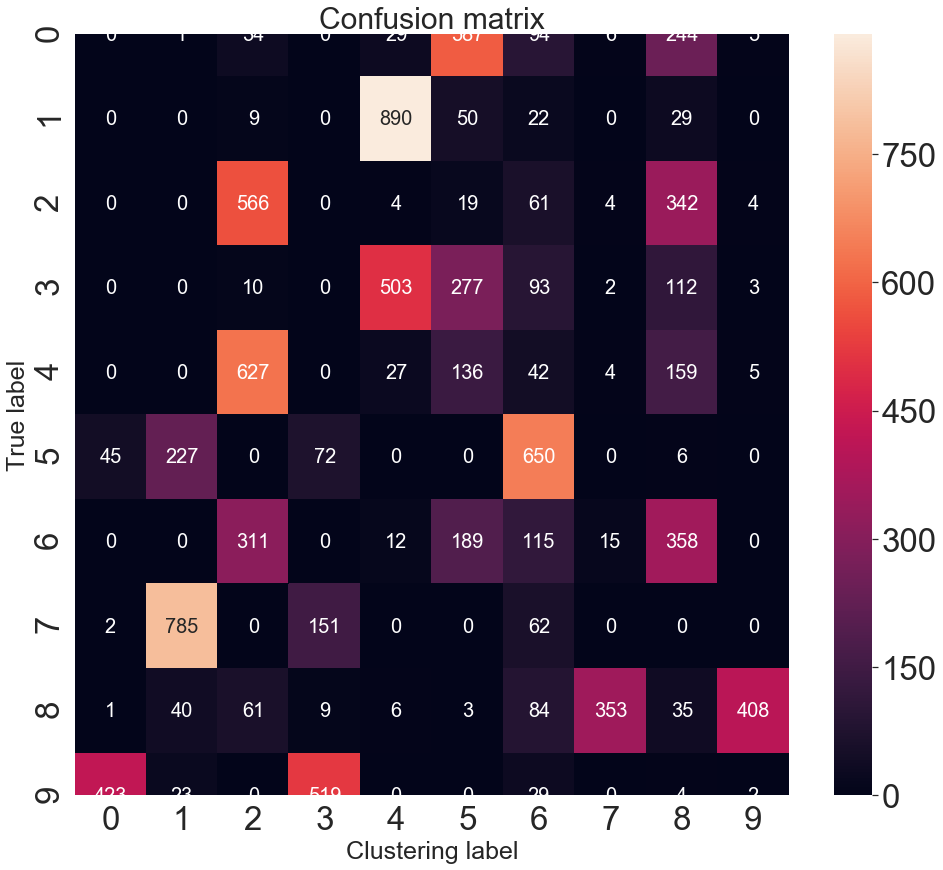

In [6]:
sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(y_testa, ylab_test)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

In [7]:
# autoencoder kmeans
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
max_value = float(x_traina.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [8]:
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()

Compression factor: 24.5


In [9]:
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [19]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
his = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2827 - accuracy: 0.5085 - val_loss: 0.2849 - val_accuracy: 0.5063
Epoch 2/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2825 - accuracy: 0.5085 - val_loss: 0.2849 - val_accuracy: 0.5064
Epoch 3/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2825 - accuracy: 0.5085 - val_loss: 0.2848 - val_accuracy: 0.5063
Epoch 4/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2824 - accuracy: 0.5086 - val_loss: 0.2848 - val_accuracy: 0.5064
Epoch 5/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2823 - accuracy: 0.5086 - val_loss: 0.2847 - val_accuracy: 0.5062
Epoch 6/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2823 - accuracy: 0.5086 - val_loss: 0.2847 - val_accuracy: 0.5064
Epoch 7/20
60000/60000 [==============================] 

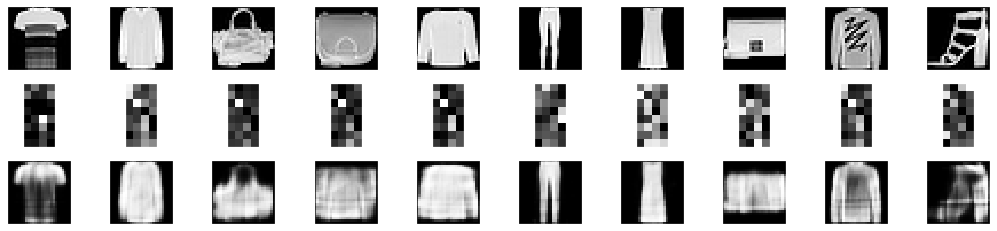

In [20]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_testa[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
kmeans.fit(encoded_imgs)
y = kmeans.predict(encoded_imgs)

score_1 = metrics.v_measure_score(y_test, y)
print('Accuracy:{0:f}'.format(score_1))

Accuracy:0.455735


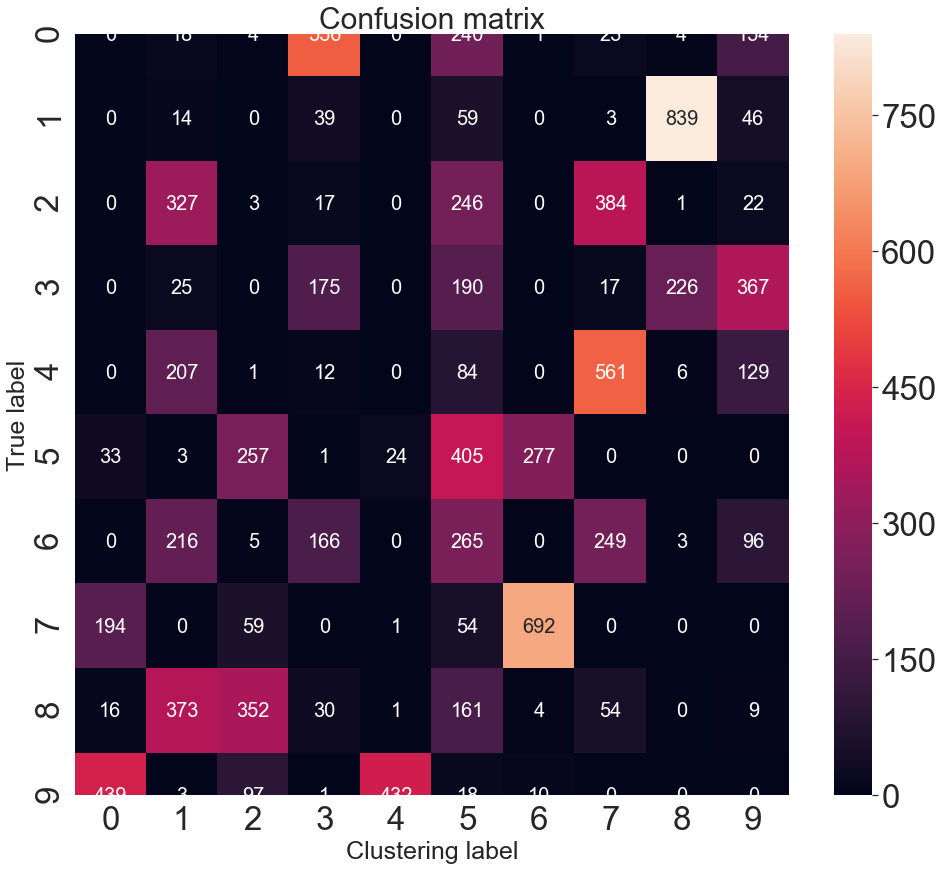

In [22]:
sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(y_testa, y)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

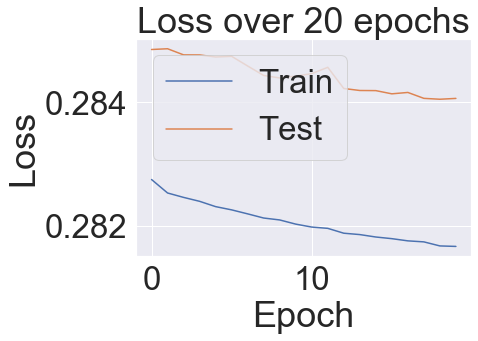

In [24]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Loss over 20 epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
# Gaussian Mixture Model
(x_traina, y_traina), (x_testa, y_testa) = fashion_mnist.load_data()



In [42]:
model = GaussianMixture()
model.fit(encoded_imgs)
model.predict(encoded_imgs)

array([0, 0, 0, ..., 0, 0, 0])

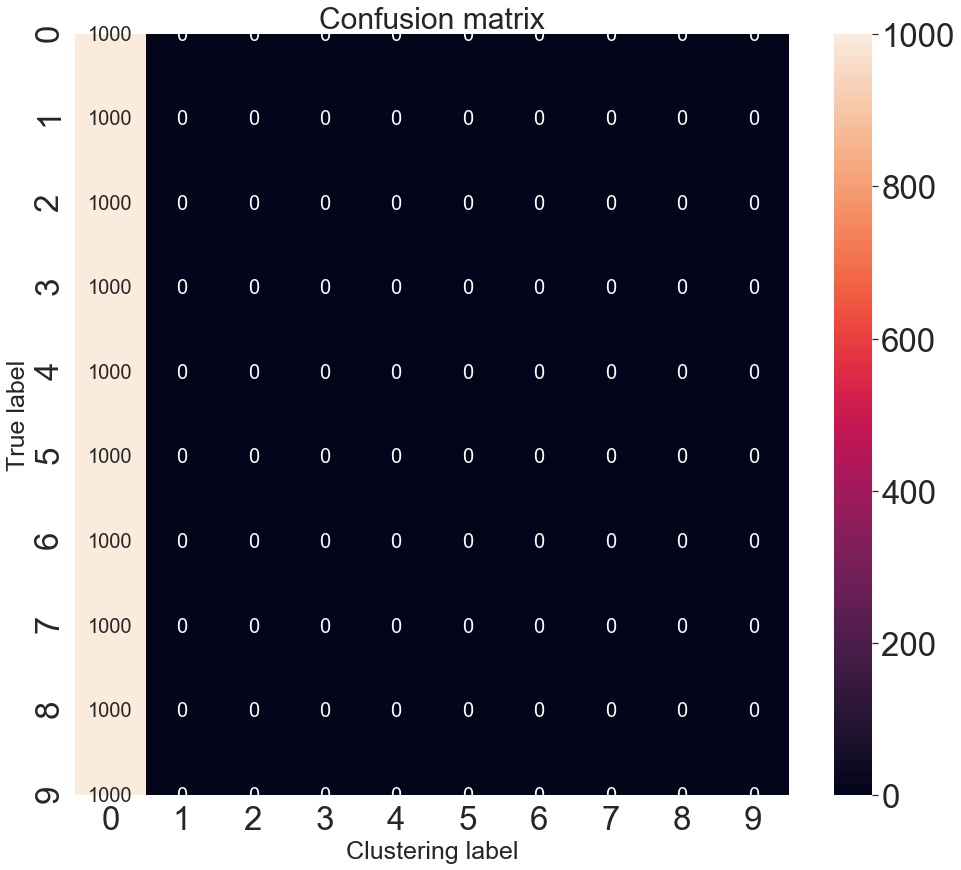

In [39]:
sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(y_testa, ya)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()